<a href="https://colab.research.google.com/github/vale314/GLAMUR-IA/blob/main/GLAMUR01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils 
import random

In [7]:


# Import the data from keras.dataset

(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [8]:
# Normalize the input image so that each pixel value is between 0 to 1.

train_images = train_images / 255.0
test_images = test_images / 255.0

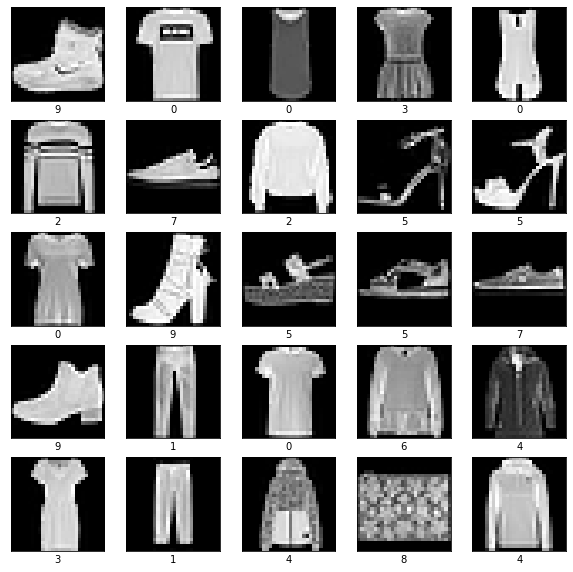

In [9]:
# Show the first 25 images in the training dataset.

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.gray)
  plt.xlabel(train_labels[i])
plt.show()

In [ ]:
# Define the model

model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(28, 28)),
  keras.layers.Reshape(target_shape=(28, 28, 1)),
  keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu),
  keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Dropout(0.25),
  keras.layers.Flatten(),
  keras.layers.Dense(10)
])

# Compile the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model

model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 148s 79ms/step - loss: 0.4028 - accuracy: 0.8552
Epoch 2/30
1875/1875 [==============================] - 145s 78ms/step - loss: 0.2795 - accuracy: 0.9004
Epoch 3/30
1875/1875 [==============================] - 144s 77ms/step - loss: 0.2393 - accuracy: 0.9135
Epoch 4/30
1875/1875 [==============================] - 144s 77ms/step - loss: 0.2129 - accuracy: 0.9223
Epoch 5/30
1875/1875 [==============================] - 143s 76ms/step - loss: 0.1894 - accuracy: 0.9301
Epoch 6/30
1875/1875 [==============================] - 140s 75ms/step - loss: 0.1711 - accuracy: 0.9377
Epoch 7/30
1875/1875 [==============================] - 139s 74ms/step - loss: 0.1575 - accuracy: 0.9417
Epoch 8/30
1875/1875 [==============================] - 138s 74ms/step - loss: 0.1486 - accuracy: 0.9450
Epoch 9/30
1875/1875 [==============================] - 139s 74ms/step - loss: 0.1385 - accuracy: 0.9494
Epoch 10/30
1875/1875 [==============================] 

In [11]:
# Check the structure of our model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                        

In [25]:
model.save("model01.h5")

In [12]:
# Evaluate the model using all images in the test dataset.

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 7s 20ms/step - loss: 0.3523 - accuracy: 0.9216
Test accuracy: 0.9215999841690063


In [13]:
from google.colab import files
uploaded = files.upload()

image_name = ""

for key in uploaded.keys():
  image_name = key;

# painting=plt.imread(image_name)
# print(painting.shape)

Saving 10.jpg to 10 (1).jpg


In [27]:
from PIL import Image 
import PIL.ImageOps 
image_file = Image.open(image_name) # open colour image
image_file = image_file.convert('1') # convert image to black and white
image_file.save('result.jpg')

image = Image.open('result.jpg')
image_file = PIL.ImageOps.invert(image)
image_file.save('result.jpg')

painting=plt.imread("result.jpg")
datas = painting / 255.0

(28, 28)


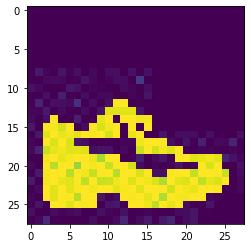

In [28]:
# comentar si no se ocupa (se muestra la imagen sin normalizar)
print(painting.shape)
plt.imshow(painting)
# fin

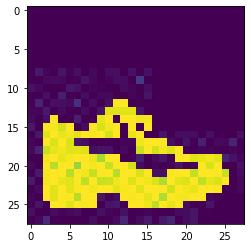

In [29]:
# comentar si no se ocupa (se muestra la imagen normalizada)
plt.imshow(datas)
# fin

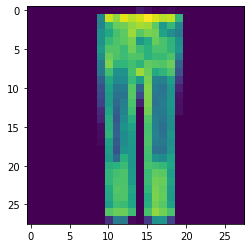

In [30]:
# Comentar si no se ocupa (se muestran un ejemplo de una imagen del dataset)
plt.imshow(test_images[15])

In [15]:
arr = np.array([datas, datas])

pre = model.predict(arr)

prediction_digits = np.argmax(pre, axis=1)

print (prediction_digits[0])

5


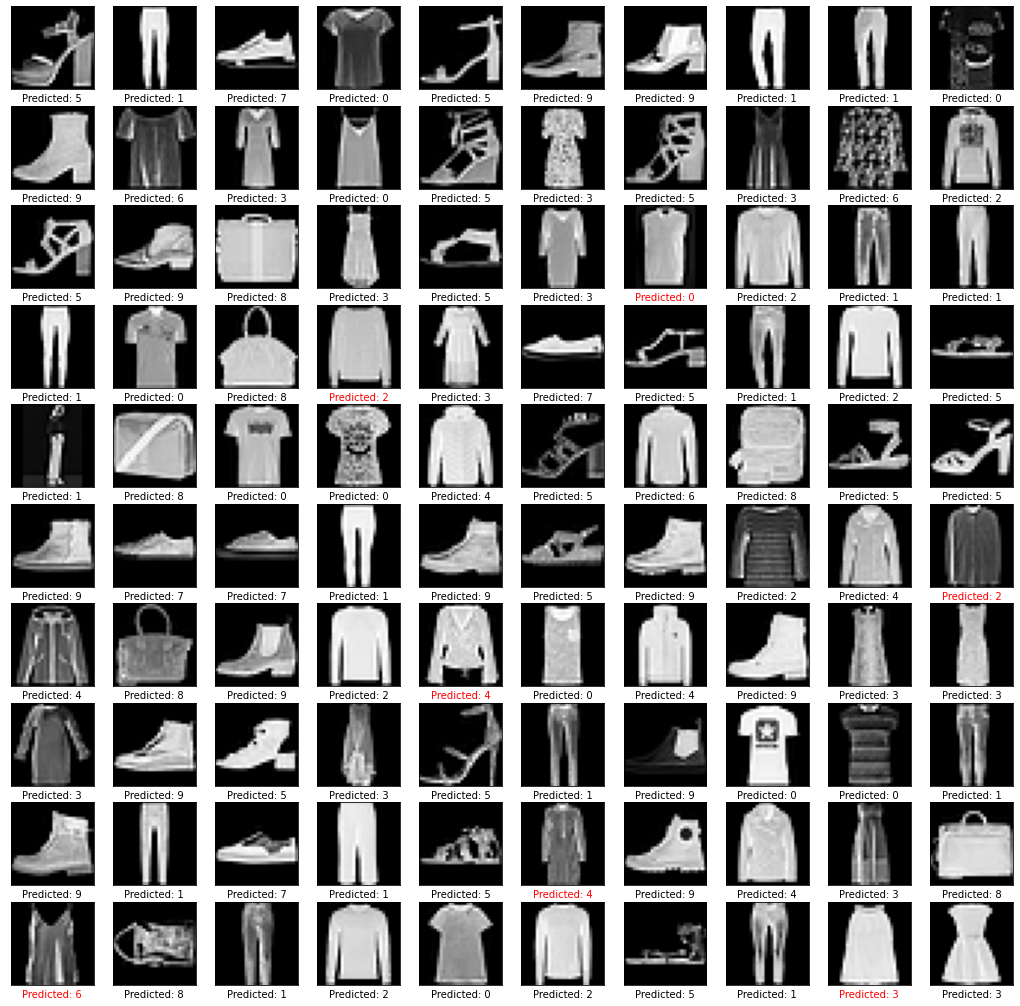

In [26]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.

def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Predict the labels of digit images in our test dataset.

predictions = model.predict(test_images)

# As the model output 10 float representing the probability of the input image
# being a digit from 0 to 9, we need to find the largest probability value
# to find out which digit the model predicts to be most likely in the image.

prediction_digits = np.argmax(predictions, axis=1)

# Then plot 100 random test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.

plt.figure(figsize=(18, 18))
for i in range(100):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image_index = random.randint(0, len(prediction_digits))
  plt.imshow(test_images[image_index], cmap=plt.cm.gray)
  ax.xaxis.label.set_color(get_label_color(prediction_digits[image_index],\
                                           test_labels[image_index]))
  plt.xlabel('Predicted: %d' % prediction_digits[image_index])
plt.show()
